<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-файлов." data-toc-modified-id="Изучение-файлов.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение файлов.</a></span></li><li><span><a href="#Проверка-правильности-расчёта-эффективности-обогащения." data-toc-modified-id="Проверка-правильности-расчёта-эффективности-обогащения.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка правильности расчёта эффективности обогащения.</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке." data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке.</a></span></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных.</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах." data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах.</a></span></li><li><span><a href="#Сравнение--размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравнение--размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение  размеров гранул исходного сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Суммарная-концентрация-металлов-на-разных-стадиях." data-toc-modified-id="Суммарная-концентрация-металлов-на-разных-стадиях.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация металлов на разных стадиях.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-sMAPE." data-toc-modified-id="Функция-для-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для sMAPE.</a></span></li><li><span><a href="#Создание-выборок." data-toc-modified-id="Создание-выборок.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Создание выборок.</a></span></li><li><span><a href="#Выбор-лучшей-модели." data-toc-modified-id="Выбор-лучшей-модели.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выбор лучшей модели.</a></span><ul class="toc-item"><li><span><a href="#RandomForestRegressor." data-toc-modified-id="RandomForestRegressor.-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>RandomForestRegressor.</a></span></li><li><span><a href="#DecisionTreeRegressor." data-toc-modified-id="DecisionTreeRegressor.-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>DecisionTreeRegressor.</a></span></li></ul></li><li><span><a href="#Проверка-на-тестовой-выборке." data-toc-modified-id="Проверка-на-тестовой-выборке.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка на тестовой выборке.</a></span></li><li><span><a href="#Проверка-на-константной-модели." data-toc-modified-id="Проверка-на-константной-модели.-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка на константной модели.</a></span></li></ul></li><li><span><a href="#Вывод." data-toc-modified-id="Вывод.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод.</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

**Используемые инструменты:**
pandas, numpy, matplotlib, seaborn, scipy, sklearn

## Подготовка данных

### Изучение файлов.

In [1]:
# импортируем все нужные библиотеки
import pandas as pd
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

STATE = np.random.RandomState(12345)

In [2]:
df_train = '/datasets/gold_industry_train.csv' 
df_test = '/datasets/gold_industry_test.csv' 
df_full = '/datasets/gold_industry_full.csv'

if os.path.exists(df_train):
    query_train = pd.read_csv(df_train)
elif os.path.exists(df_test):
    query_test = pd.read_csv(df_test)
elif os.path.exists(df_full):
    query_full = pd.read_csv(df_full)
else:
    print('Что-то пошло не по плану.')

# сохраним в переменную обучающую выборку
df_train = pd.read_csv('/datasets/gold_industry_train.csv') 
# тестовую выборку
df_test = pd.read_csv('/datasets/gold_industry_test.csv') 
# и исходные данные
df_full = pd.read_csv('/datasets/gold_industry_full.csv') 

In [3]:
# напишем функцию для вывода всей информации
def info(df):
    display(df.info())
    display(df.sample(10))
    display(df.describe().T)
    print('*' * 100)

In [4]:
for df in [df_train, df_test, df_full]:
    info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


None

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
1990,2016-04-29 22:59:59,6.598314,7.428899,3.121435,NaN,562.347365,57.469685,10.771928,5.375246,1000.292976,...,11.051053,45.287703,3.920338,10.078976,9.148897,65.200561,2.537199,7.650352,2.079557,11.884037
6582,2016-11-30 23:59:59,10.588789,9.730610,4.592616,19.410935,179.904602,88.142024,12.998855,5.100194,1053.982703,...,0.000000,43.183382,6.731278,10.161368,8.299971,73.467544,3.426789,10.841403,3.492402,6.080923
9205,2017-04-03 13:59:59,7.629727,6.752622,4.957743,39.580756,551.943460,53.600822,17.997643,6.599009,1000.200838,...,4.068375,44.195548,3.778843,13.618535,7.386378,65.324706,2.981912,7.043901,4.047227,12.350950
12999,2017-09-30 23:59:59,12.613506,13.149099,6.013013,35.418117,447.970107,49.592926,11.952105,7.197269,1301.870472,...,5.131174,42.339264,6.348861,10.892700,8.442534,79.145480,3.442082,15.020250,3.722153,6.781955
11502,2017-07-23 12:59:59,11.971857,13.079138,5.670779,40.288417,511.248477,47.523377,13.747831,7.518502,1201.848437,...,7.856225,45.830429,5.405570,9.480588,10.288149,71.489739,4.196976,14.881438,4.105106,11.928071
10114,2017-05-19 22:59:59,6.874674,5.935849,2.984894,43.788691,575.345544,58.042789,17.999559,6.401473,1000.566189,...,2.517501,41.780833,5.537321,12.659839,6.348174,73.516913,2.071166,6.786461,2.340700,9.917045
7225,2016-12-28 19:59:59,7.294356,8.039748,3.373283,35.810835,431.665947,51.463600,12.502206,4.101663,1298.766427,...,7.378701,48.030530,3.539175,9.989117,11.323443,55.933202,3.512783,8.559376,3.326999,11.483454
8357,2017-02-22 01:59:59,5.918339,6.975849,2.784988,38.787174,504.470089,52.318718,17.000123,4.599433,998.798435,...,3.162953,47.728580,3.722409,10.059069,7.989299,61.838409,2.446098,7.535716,2.698499,10.633084
10492,2017-06-09 10:59:59,9.129400,7.863408,4.546830,45.932508,660.368401,73.597272,18.002818,6.497630,1300.441953,...,7.289431,42.041341,5.908475,12.498464,9.267660,77.519356,2.467760,7.510774,3.354385,14.977395
13104,2017-10-05 08:59:59,6.362825,10.136104,3.001986,33.565550,363.437866,55.009918,5.289130,6.932844,996.768820,...,NaN,48.110914,5.816174,7.702905,7.682277,61.347281,2.676565,12.149815,2.189581,3.582011


,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_au,14579.0,8.352941,1.934376,0.010000,6.932996,8.225284,9.832210,13.731330
rougher.input.feed_ag,14579.0,8.877460,1.922536,0.010000,7.341922,8.715859,10.255843,14.596026
rougher.input.feed_pb,14507.0,3.604221,1.056063,0.010000,2.880490,3.532399,4.257282,7.052325
rougher.input.feed_sol,14502.0,36.561420,5.209823,0.010000,34.093951,37.097511,39.899799,53.475325
rougher.input.feed_rate,14572.0,474.332784,108.503552,0.002986,411.048483,498.187968,549.586552,717.508837
...,...,...,...,...,...,...,...,...
final.output.recovery,14579.0,66.759066,10.619709,0.000000,63.114596,67.962788,72.598187,100.000000
final.output.tail_au,14579.0,3.087939,0.915187,0.000000,2.505287,3.029238,3.614098,8.245022
final.output.tail_ag,14578.0,9.731972,2.358143,0.000000,8.088928,9.818512,11.169187,19.552149
final.output.tail_pb,14504.0,2.719985,0.958929,0.000000,2.036512,2.774847,3.353845,5.804178


****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null

None

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
3028,2018-05-19 07:59:59,8.502028,7.716918,3.809039,30.522297,369.954229,41.725262,9.999131,5.044090,1500.054800,...,24.937402,-500.533097,23.082277,-500.111084,22.970991,-500.241092,19.974936,-499.850940,25.026196,-600.352953
4135,2018-07-09 05:59:59,7.557595,7.553601,3.225060,33.434983,502.120211,55.393617,12.000477,5.494759,1000.021789,...,19.960798,-500.244115,8.040340,-501.130468,19.038692,-500.496114,6.947720,-499.808657,24.998499,-500.245682
966,2018-02-08 17:59:59,8.507986,12.384425,3.544659,43.028408,650.749989,87.718082,10.662550,7.598183,1304.011242,...,26.954071,-501.101223,19.975769,-501.716979,17.992978,-504.073758,12.000156,-500.013835,14.984751,-498.827799
907,2018-02-06 02:59:59,7.728257,8.024907,3.965616,40.248836,610.884714,83.760308,12.656185,7.197703,1058.270203,...,27.027102,-501.608023,20.013320,-500.267303,19.948810,-500.865658,14.973516,-499.798322,18.003836,-499.232156
222,2017-12-19 20:59:59,5.768137,5.463026,4.971261,32.243634,539.097516,73.935177,8.751334,5.999068,1003.867565,...,25.071612,-386.688363,20.005766,-308.089246,18.050296,-526.860424,13.025227,-499.611016,13.014109,-505.480611
3698,2018-06-17 19:59:59,9.362653,10.556277,3.534081,35.017828,448.946429,43.581265,10.007499,6.801367,995.939647,...,13.977355,-501.726013,13.080074,-499.669312,10.212767,-500.126277,8.092715,-499.756617,23.004981,-500.421019
3674,2018-06-16 19:59:59,11.313282,10.577412,4.168304,36.834150,448.081436,44.448912,12.000861,6.871052,989.115441,...,12.012161,-499.843081,11.923635,-499.462946,9.920328,-499.817962,7.102368,-500.088793,18.008842,-500.994811
3016,2018-05-18 19:59:59,8.816571,9.216098,3.155581,32.016119,392.800366,44.128675,9.500265,5.699180,1506.554173,...,25.014283,-498.733775,23.036002,-499.532562,23.024167,-499.221667,19.958910,-499.966681,25.010155,-599.782285
803,2018-02-01 15:59:59,7.650635,9.157993,2.287843,41.461020,497.992815,47.566860,10.427430,6.998809,1205.020100,...,29.996728,-499.196589,21.954571,-493.069931,25.003962,-499.088451,23.001402,-500.100245,25.011416,-499.867805
4535,2018-08-02 19:59:59,7.759743,8.180522,2.924599,31.300019,528.946664,55.567279,9.202802,7.500069,1000.520214,...,12.030656,-499.700890,12.044848,-500.482306,11.974381,-501.374581,10.039652,-500.125716,20.007938,-501.680551


,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_au,4860.0,8.005584,1.993590,1.000000e-02,6.574363,7.812923,9.556589,13.417156
rougher.input.feed_ag,4860.0,8.547348,1.958601,1.000000e-02,6.975898,8.179714,10.084339,14.533698
rougher.input.feed_pb,4832.0,3.579662,1.029377,1.000000e-02,2.903612,3.540772,4.199847,7.142594
rougher.input.feed_sol,4838.0,37.095864,4.926284,1.000000e-02,34.510841,37.499761,40.461315,53.477742
rougher.input.feed_rate,4856.0,490.285103,94.371623,1.278570e-02,434.099695,502.118742,555.596563,702.523396
rougher.input.feed_size,4816.0,59.113400,19.125122,4.636880e-02,47.596984,55.509481,66.661547,363.989699
rougher.input.floatbank10_sulfate,4857.0,12.055735,3.407642,1.890695e-02,9.890429,11.997859,14.496072,30.010759
rougher.input.floatbank10_xanthate,4859.0,6.101308,1.042754,1.578303e-02,5.499808,6.099805,6.802101,9.396928
rougher.state.floatbank10_a_air,4859.0,1108.635895,156.493143,3.007925e+02,999.715729,1001.414798,1202.837565,1521.980372
rougher.state.floatbank10_a_level,4859.0,-368.340127,91.155929,-6.005681e+02,-499.731972,-300.181367,-299.961547,-281.039299


****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   1940

None

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
864,2016-02-23 10:00:00,6.234503,7.843418,2.481662,30.449925,546.715610,59.535717,11.259258,7.474099,1000.458052,...,10.743130,40.534069,5.364928,11.980384,2.948743,61.390077,2.658126,10.482351,1.322921,14.890283
12196,2017-08-23 08:59:59,9.853309,10.618135,3.213455,42.176919,573.664115,92.425408,12.450746,6.803523,1403.214391,...,2.460950,44.661693,7.162989,9.248630,10.559422,78.576087,2.553654,10.412985,1.209133,15.443851
13124,2017-10-06 04:59:59,6.150356,9.921851,2.580844,44.033355,619.839431,100.283630,8.401041,6.897823,995.195527,...,4.126744,46.931598,5.171029,8.855319,9.184826,70.482973,2.000151,11.571365,1.236770,9.690937
13742,2017-11-03 08:59:59,5.325222,6.287209,3.772562,43.195694,559.012158,76.255861,8.335622,5.500142,1199.392038,...,0.610950,44.436957,4.456259,12.044901,6.369979,67.009591,1.910207,8.031402,2.574121,9.982944
3731,2016-07-20 22:59:59,9.949980,9.710863,3.717719,34.966881,399.836630,42.510857,11.996100,6.204187,1000.411051,...,9.331983,47.093817,4.817169,8.902082,9.355339,62.433354,4.305855,10.033326,3.340779,9.639864
5582,2016-10-18 14:59:59,6.101406,9.270260,1.038115,40.537071,463.108208,48.322088,10.999635,5.659830,1000.443628,...,9.787507,47.755104,4.787725,7.707446,12.693762,62.851954,2.464455,10.042878,1.958560,11.131723
12855,2017-09-24 15:59:59,7.100659,7.579670,3.313884,38.885247,551.059005,67.523925,9.548527,6.699916,1398.341340,...,1.132492,45.334612,4.757620,11.679061,8.447738,72.314242,2.216975,9.281918,1.748239,8.398570
12270,2017-08-26 10:59:59,8.496872,9.807645,2.840301,40.587600,613.165648,81.717270,12.256371,7.796215,1403.060240,...,4.283010,45.010587,5.908954,9.554086,8.713636,82.016577,1.807947,10.735141,1.120316,13.228055
17820,2018-05-28 20:59:59,10.211664,9.673671,4.548573,32.563470,363.391164,42.788268,10.003352,4.999756,999.721599,...,10.560944,44.696874,4.454704,10.825813,14.373413,61.859525,4.535811,10.286158,4.022878,9.036729
4643,2016-08-30 03:59:59,7.309992,6.145848,3.285393,30.149547,463.330708,43.108813,12.998197,6.702121,1002.202805,...,6.230653,45.210779,3.584052,9.345538,10.097917,63.638609,2.962881,7.110398,2.816520,9.410616


,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_au,19439.0,8.266097,1.955092,0.010000,6.854384,8.125839,9.769917,13.731330
rougher.input.feed_ag,19439.0,8.794927,1.936847,0.010000,7.237967,8.593574,10.213771,14.596026
rougher.input.feed_pb,19339.0,3.598085,1.049486,0.010000,2.887280,3.534895,4.244161,7.142594
rougher.input.feed_sol,19340.0,36.695114,5.145445,0.010000,34.207799,37.202650,40.039133,53.477742
rougher.input.feed_rate,19428.0,478.320042,105.373758,0.002986,416.525453,499.416120,550.172183,717.508837
...,...,...,...,...,...,...,...,...
final.output.recovery,19439.0,67.050208,10.125840,0.000000,63.299712,68.172738,72.686642,100.000000
final.output.tail_au,19439.0,3.042467,0.922808,0.000000,2.461138,2.984909,3.571351,8.245022
final.output.tail_ag,19438.0,9.688589,2.328642,0.000000,8.062878,9.743623,11.134294,19.552149
final.output.tail_pb,19338.0,2.705795,0.949077,0.000000,2.040119,2.748730,3.333216,5.804178


****************************************************************************************************


**Изучили информацию по всем трём файлам.**

df_train состоит из 14579 объектов и 86 признаков.

df_test состоит из 4860 объектов и 52 признаков.

df_full состоит из 19439 лбъектов и 86 признаков.

Во всех трёх файлах содержится информация о технологическом процессе, параметре этапов.

**Технологический процесс:**
* Rougher feed — исходное сырье
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
* Xanthate — ксантогенат (промотер, или активатор флотации);
* Sulphate — сульфат (на данном производстве сульфид натрия);
* Depressant — депрессант (силикат натрия).
* Rougher process (англ. «грубый процесс») — флотация
* Rougher tails — отвальные хвосты
* Float banks — флотационная установка
* Cleaner process — очистка
* Rougher Au — черновой концентрат золота
* Final Au — финальный концентрат золота

**Параметры этапов:**
* air amount — объём воздуха
* fluid levels — уровень жидкости
* feed size — размер гранул сырья
* feed rate — скорость подачи

**Признаки записываются как:**

`[этап].[тип_параметра].[название_параметра]`

**Возможные значения для блока [этап]:**
* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

**Возможные значения для блока [тип_параметра]:**
* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики

**Проверку на пропуски и дубликаты сделаем на этапе Предобработка данных.**

### Проверка правильности расчёта эффективности обогащения.

In [5]:
# для ручного расчёта эффективности обогащения
# сохраним в переменные нужные признаки
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

In [6]:
# рассчитываем эффективность обогащения
# и сравниваем её с табличной с помощью mae
recovery = ((C * (F - T)) / (F * (C - T))) * 100
mae = mean_absolute_error(df_train['rougher.output.recovery'], recovery)
print('MAE:', mae)

MAE: 9.83758577644259e-15


Сравнение между нашими расчётами и табличной величиной показало очень незначительную разницу, следовательно, `rougher.output.recovery` посчитана правильно.

### Анализ признаков, недоступных в тестовой выборке.

In [7]:
# отдельно выведем размеры таблиц
for df in [df_train, df_test, df_full]:
    print('Размер таблицы:', df.shape)

Размер таблицы: (14579, 87)
Размер таблицы: (4860, 53)
Размер таблицы: (19439, 87)


In [8]:
# выведем признаки, недоступные в тестовой выборке
set(df_train.columns) - set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутствуют 34 признака. Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

### Предобработка данных.

In [9]:
data = [df_train, df_test, df_full]

In [10]:
# проверим на дубликаты
print('Кол-во дубликатов:')
for df in [df_train, df_test, df_full]:
    print(df.duplicated().sum())

Кол-во дубликатов:
0
0
0


In [11]:
# посмотрим на кол-во пропусков
print('Кол-во пропусков:')
for df in [df_train, df_test, df_full]:
    print(df.isna().sum().sum())

Кол-во пропусков:
3050
375
4481


Исходя из того, что соседние по времени признаки часто похожи, мы заполним пропуски соседними значениями.

In [12]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

print('Кол-во пропусков:')
print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())
print(df_full.isna().sum().sum())

Кол-во пропусков:
0
0
0


На этапе подготовки данных мы изучили информацию по трём файлам, узнав их размеры и принцип записи признаков. Произвели ручной расчёт эффективности обогащения и сравнили его с табличными данными. Получив значение близкое к нулю, мы убедились, что табличный вариант рассчитан правильно, и мы можем его использовать в дальнейшем исследовании. Выяснили, что в тестовой выборке отсутствуют 34 признака, что связано с тем, что замеряются и/или рассчитываются значительно позже. Перед обучением моделей мы сравняем кол-во признаков во всех файлах. Заполнили пропуски соседними значениями. Дубликатов не выявили. Перейдём к анализу данных.

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах.

In [13]:
# напишем функцию для построения графиков
def concentration(df, a, b, c, d):
    # создадим список с названиями металлов
    metals = ['au', 'ag', 'pb']
    
    for i in metals:
        plt.figure(figsize=(15,10))
        sns.kdeplot(df[a + i], shade=True, color='darkred', label='в сырье')
        sns.kdeplot(df[b + i], shade=True, color='crimson', label='в черновом концентрате')
        sns.kdeplot(df[c + i], shade=True, color='coral', label='после первичной очистки')
        sns.kdeplot(df[d + i], shade=True, color='gold', label='финальный концентрат')

        plt.title('Концентрация ' + i + ' на этапах очистки.', fontsize=25)
        plt.xlabel('Концентрация.', fontsize = 20)
        plt.legend()
        plt.show()

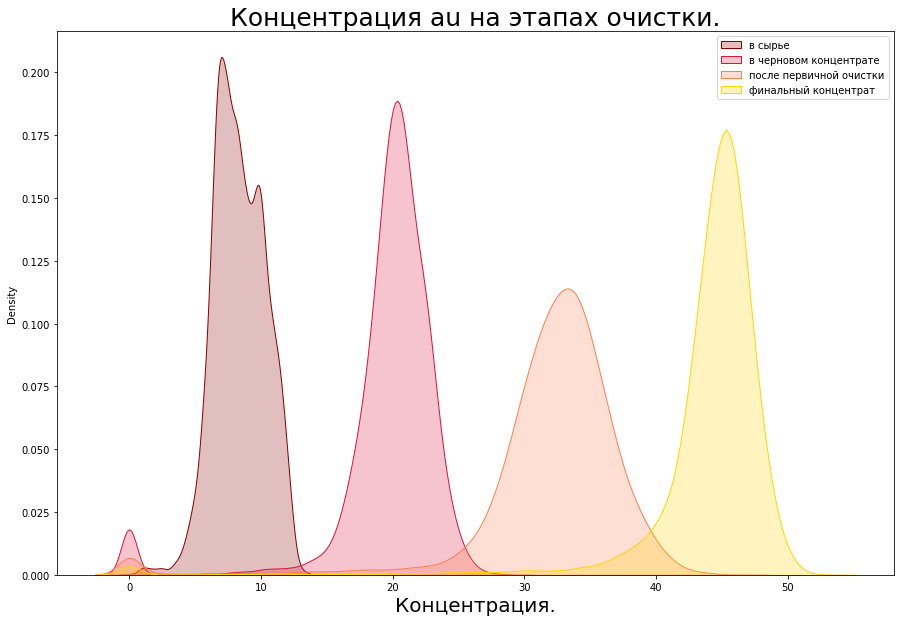

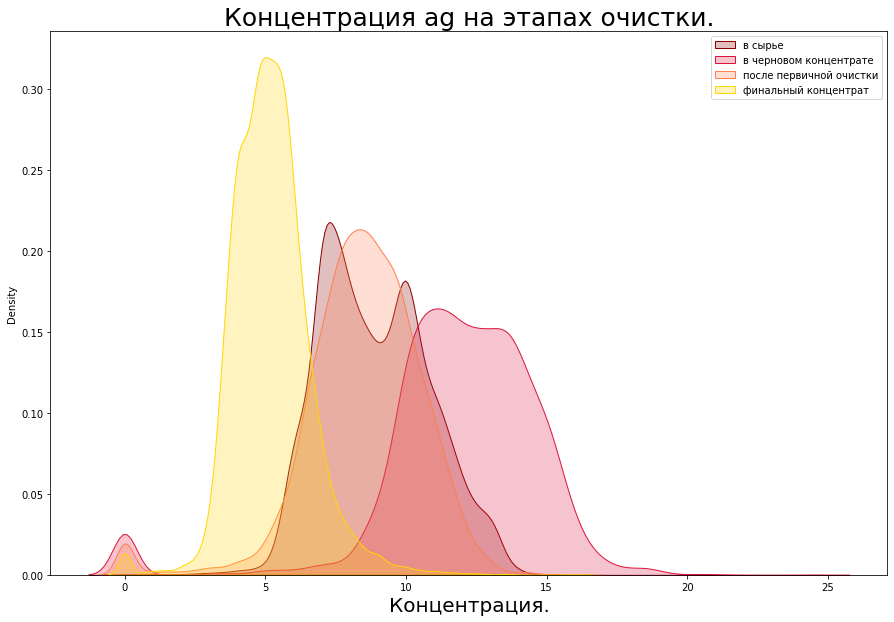

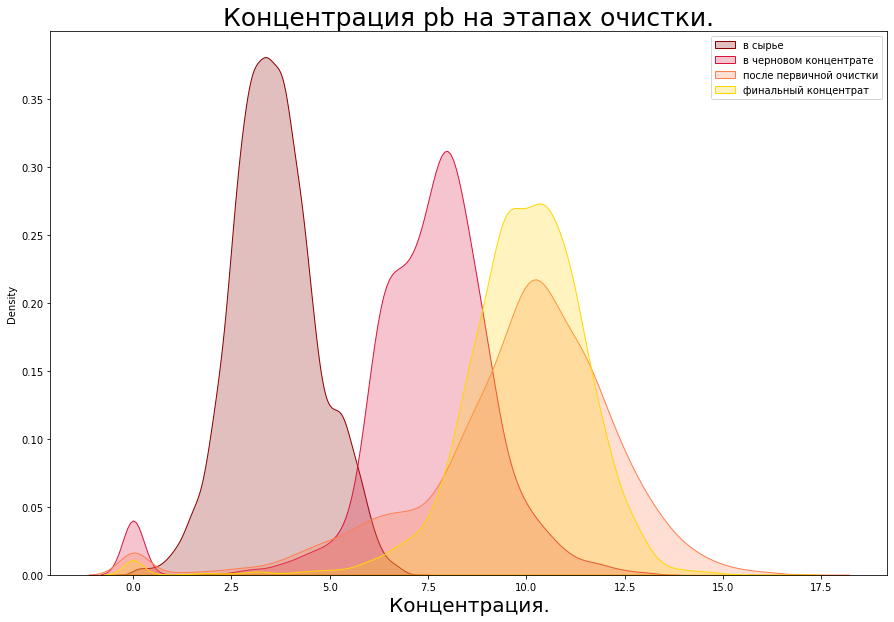

In [14]:
concentration(df_train, 'rougher.input.feed_', 'rougher.output.concentrate_',
              'primary_cleaner.output.concentrate_', 'final.output.concentrate_')

In [15]:
# удалим аномальные значения
# сохраним названия колонок в список
col = ['rougher.input.feed_', 'rougher.output.concentrate_',
              'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
# сохраним металлы в список
metals = ['au', 'ag', 'pb']
# циклом уберём аномальные значения
for i, x in zip(col, metals):
    df_train = df_train[df_train[i + x] >= 1]

В сырье мы видим низкую концентрацию свинца и практически одинаковую концентрацию золота и серебра. В черновом концентрате видим рост концентрации всех металлов почти в два раза. После первичной обработки так же наблюдаем рост всех металлов, за исключением серебра. Его концентрация немного понизилась. На финальном этапе видим, что концентрация свинца не меняется, остаётся на таком же уровне, что и на предыдущем этапе. Концентрация серебра сильно уменьшилась и стала даже меньше, чем на начальном этапе. А вот концентрация золота стабильно увеличивалась от этапа к этапу. Учитывая, что это золотообрабатывающее предприятие, мы можем сказать, что их технология обработки достаточна эффективна.

### Сравнение  размеров гранул исходного сырья на обучающей и тестовой выборках.

Нулевая гипотеза: размер гранул исходного сырья на обучающей и тестовой выборках одинаков.

                                H0: μ1 = μ2
Альтернативная гипотеза: размер гранул исходного сырья на обучающей и тестовой выборках разный.

                                H1: μ1 != μ2

In [16]:
train_input = df_train['rougher.input.feed_size']
test_input = df_test['rougher.input.feed_size']


alpha = 0.05 
results = st.ttest_ind(train_input, test_input)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не можем отвергнуть нулевую гипотезу.') 

p-значение: 0.8971358410997188
Не можем отвергнуть нулевую гипотезу.


Для сравнения размера гранул исходного сырья в обучающей и тестовой выборках мы использовали статистический тест. И по его результатам мы не смогли отвергнуть гипотезу о том, что их размеры одинаковы. Из чего можем сделать предположение, что их размер одинаков.

### Суммарная концентрация металлов на разных стадиях.

In [17]:
# напишем функцию для построения графиков 
# с суммарной концентрацией металлов на каждом этапе
def metal_sum(df):
    # создадим столбцы с суммой всех металлов на каждом этапе очистки
    df['rougher_input_feed_all_metal'] = (df['rougher.input.feed_au'] + 
                                 df['rougher.input.feed_ag'] + 
                                 df['rougher.input.feed_pb'])

    df['rougher_output_concentrate_all_metal'] = (df['rougher.output.concentrate_au'] + 
                                 df['rougher.output.concentrate_ag'] + 
                                 df['rougher.output.concentrate_pb'])

    df['primary_output_concentrate_all_metal'] = (df['primary_cleaner.output.concentrate_au'] + 
                                 df['primary_cleaner.output.concentrate_ag'] + 
                                 df['primary_cleaner.output.concentrate_pb'])


    df['final_output_concentrate_all_metal'] = (df['final.output.concentrate_au'] + 
                                 df['final.output.concentrate_ag'] + 
                                 df['final.output.concentrate_pb'])
    
    # построим график
    plt.figure(figsize=(15,10))
    sns.kdeplot(df['rougher_input_feed_all_metal'], shade=True, color='darkred', label='в сырье')
    sns.kdeplot(df['rougher_output_concentrate_all_metal'], shade=True, color='crimson', label='в черновом концентрате')
    sns.kdeplot(df['primary_output_concentrate_all_metal'], shade=True, color='coral', label='после первичной очистки')
    sns.kdeplot(df['final_output_concentrate_all_metal'], shade=True, color='gold', label='финальный концентрат')

    plt.title('Концентрация всех металлов на всех этапах.', fontsize=25)
    plt.xlabel('Концентрация.', fontsize=20)
    plt.legend()
    plt.show()

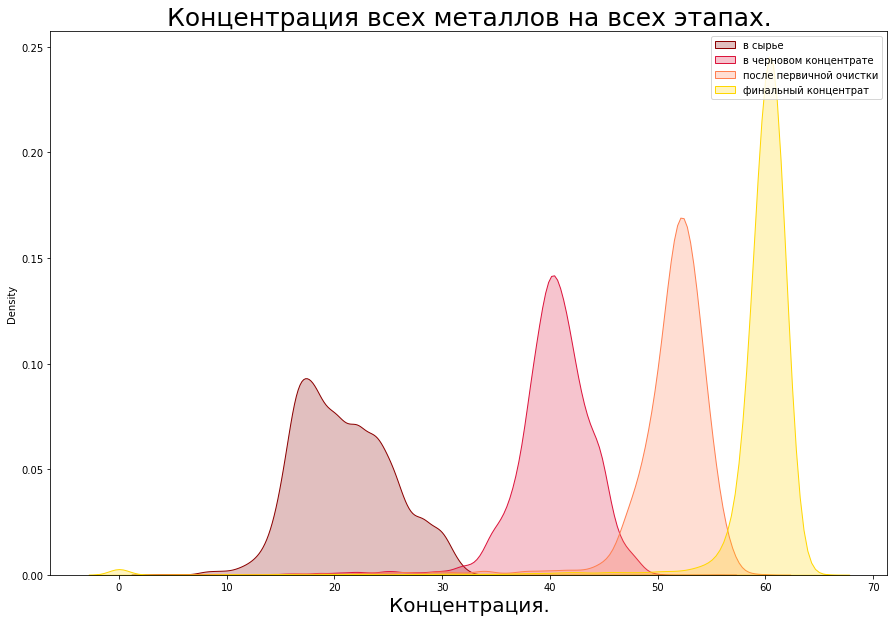

In [18]:
metal_sum(df_train)

На этапе анализа данных мы построили график концентрации металлов (Au, Ag, Pb) на различных этапах. Сделали вывод о том, что технология по очистке металла на предприятии достаточно эффективная, в связи с ростом концентрации золота с каждым этапом. Провели статистический тест для сравнения размера гранул в исходном сырье в обучающей и тестовой выборках. И сделали предположение, что их размеры практически одинаковы. На графике с концентрацией всех металлов на каждом этапе хорошо виден рост концентрации каждого металла.

## Модель

### Функция для sMAPE.

In [19]:
# напишем функцию для рассчёта smape
def smape(y_target, y_predict):
    sMAPE = (sum(abs(y_target-y_predict)/((abs(y_target)+
                                           abs(y_predict))/2))/len(y_target))*100
    return sMAPE

# напишем функцию для рассчёта итогового smape
def final_smape(smape_rougher, smape_final):
    return (0.25 * smape_rougher) + (0.75 * smape_final)

In [20]:
scorer = make_scorer(smape, greater_is_better=False)

### Создание выборок.

In [21]:
# вытянем таргеты для тестовой выборки из исходной
df_test = df_test.merge(df_full[['rougher.output.recovery', 'final.output.recovery', 'date']],
                       how='inner', on='date')
# проверим
# df_test.head(2)

In [22]:
# удалим из таргетов значения, равные 0
df_train = df_train.drop(df_train[df_train['rougher.output.recovery'] == 0].index)
df_train = df_train.drop(df_train[df_train['final.output.recovery'] == 0].index)

In [23]:
# напишем функцию для удаления признаков, 
# отсутствующих в тестовой выборке
def columns_delete(train, test):
    train = train[test.columns]
    return train

In [24]:
# применим функцию и проверим
df_train = columns_delete(df_train, df_test)
# удалим более ненужный признак
df_train = df_train.drop(['date'], axis=1)
df_test = df_test.drop(['date'], axis=1)

print(df_train.shape)
print(df_test.shape)

(13856, 54)
(4860, 54)


In [25]:
# подготовим фичи и таргеты в обучающей выборке
x_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_train = df_train['rougher.output.recovery']
y_train_ = df_train['final.output.recovery']

print(x_train.shape)
print(y_train.shape)
print(y_train_.shape)

(13856, 52)
(13856,)
(13856,)


In [26]:
# в тестовой выборке
x_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_test = df_test['rougher.output.recovery']
y_test_ = df_test['final.output.recovery']

print(x_test.shape)
print(y_test.shape)
print(y_test_.shape)

(4860, 52)
(4860,)
(4860,)


### Выбор лучшей модели.

#### RandomForestRegressor.

In [27]:
%%time
# подберём параметры для RFR с y_train
model_rf = RandomForestRegressor(random_state=STATE)
params = { 'max_depth': range(2, 7),
          'n_estimators': range(20, 60, 10) }

CPU times: user 36 µs, sys: 17 µs, total: 53 µs
Wall time: 56.3 µs


In [28]:
grid_rf = GridSearchCV(model_rf, params, cv=3, scoring=scorer, verbose=2)   
grid_rf.fit(x_train, y_train)
smape_rf = abs(round(grid_rf.best_score_, 2))

print('Лучшая модель RandomForestRegressor c оценкой качества кросс-валидацией:', grid_rf)
print('Лучшие параметры:', grid_rf.best_params_)
print('smape', smape_rf)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .......................max_depth=2, n_estimators=20; total time=   1.2s
[CV] END .......................max_depth=2, n_estimators=20; total time=   1.2s
[CV] END .......................max_depth=2, n_estimators=20; total time=   1.2s
[CV] END .......................max_depth=2, n_estimators=30; total time=   1.8s
[CV] END .......................max_depth=2, n_estimators=30; total time=   2.0s
[CV] END .......................max_depth=2, n_estimators=30; total time=   2.0s
[CV] END .......................max_depth=2, n_estimators=40; total time=   2.4s
[CV] END .......................max_depth=2, n_estimators=40; total time=   2.3s
[CV] END .......................max_depth=2, n_estimators=40; total time=   2.3s
[CV] END .......................max_depth=2, n_estimators=50; total time=   2.9s
[CV] END .......................max_depth=2, n_estimators=50; total time=   2.9s
[CV] END .......................max_depth=2, n_e

In [29]:
%%time
# подберём параметры для RFR с y_train_
model_rf_final = RandomForestRegressor(random_state=STATE)
params = { 'max_depth': range(2, 7),
          'n_estimators': range(20, 60, 10) }

grid_rf_final = GridSearchCV(model_rf_final, params, cv=3, scoring=scorer, verbose=2)   
grid_rf_final.fit(x_train, y_train_)
smape_rf_final = abs(round(grid_rf_final.best_score_, 2))

print('Kучшая модель RandomForestRegressor c оценкой качества кросс-валидацией:', grid_rf_final)
print('Лучшие параметры:', grid_rf_final.best_params_)
print('smape:', smape_rf_final)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .......................max_depth=2, n_estimators=20; total time=   1.3s
[CV] END .......................max_depth=2, n_estimators=20; total time=   1.2s
[CV] END .......................max_depth=2, n_estimators=20; total time=   1.2s
[CV] END .......................max_depth=2, n_estimators=30; total time=   1.8s
[CV] END .......................max_depth=2, n_estimators=30; total time=   1.9s
[CV] END .......................max_depth=2, n_estimators=30; total time=   1.7s
[CV] END .......................max_depth=2, n_estimators=40; total time=   2.3s
[CV] END .......................max_depth=2, n_estimators=40; total time=   2.3s
[CV] END .......................max_depth=2, n_estimators=40; total time=   2.4s
[CV] END .......................max_depth=2, n_estimators=50; total time=   2.8s
[CV] END .......................max_depth=2, n_estimators=50; total time=   2.9s
[CV] END .......................max_depth=2, n_e

In [30]:
print('smape по rfr', round(final_smape(smape_rf, smape_rf_final), 2))

smape по rfr 8.67


#### DecisionTreeRegressor.

In [31]:
%%time
# подберём параметры для DTR с y_train
model_dtr = DecisionTreeRegressor(random_state=STATE)

params = {'max_depth':range(2, 6)}

CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 25.7 µs


In [32]:
grid_dtr = GridSearchCV(model_dtr, params, cv=3, scoring=scorer, verbose=2)                    
grid_dtr.fit(x_train, y_train)
smape_dtr = abs(round(grid_dtr.best_score_, 2))

print('Лучшая модель DecisionTreeRegressor c оценкой качества кросс-валидацией:', grid_dtr)
print('Лучшие параметры:', grid_dtr.best_params_)
print('smape:', smape_dtr)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.2s
[CV] END ........................................max_depth=4; total time=   0.2s
[CV] END ........................................max_depth=4; total time=   0.2s
[CV] END ........................................max_depth=5; total time=   0.2s
[CV] END ........................................max_depth=5; total time=   0.2s
[CV] END ........................................

In [33]:
%%time
# подберём параметры для DTR с y_train_
model_dtr_final = DecisionTreeRegressor(random_state=STATE)

params = {'max_depth':range(2, 6)}

grid_dtr_final = GridSearchCV(model_dtr_final, params, cv=3, scoring=scorer, verbose=2)                    
grid_dtr_final.fit(x_train, y_train_)
smape_dtr_final = abs(round(grid_dtr_final.best_score_, 2))

print('Лучшая модель DecisionTreeRegressor c оценкой качества кросс-валидацией:', grid_dtr_final)
print('Лучшие параметры:', grid_dtr_final.best_params_)
print('smape:', smape_dtr_final)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.2s
[CV] END ........................................max_depth=4; total time=   0.2s
[CV] END ........................................max_depth=4; total time=   0.2s
[CV] END ........................................max_depth=5; total time=   0.2s
[CV] END ........................................max_depth=5; total time=   0.2s
[CV] END ........................................

In [34]:
print('smape по dtr', round(final_smape(smape_dtr, smape_dtr_final), 2))

smape по dtr 8.84


Лучшей моделью для y_train стала RFR с парметрами: {'max_depth': 5, 'n_estimators': 50} и smape 6.51.

Лучшей моделью для y_train_ стала RFR с парметрами: {'max_depth': 2, 'n_estimators': 50} и smape 9.39.

Этой моделью и будем проводить проверку на тестовой выборке.

### Проверка на тестовой выборке.

In [35]:
# сохраним полученные гиперпараметры в переменных
max_depth = 5
n_estimators = 50
max_depth_final = 2
n_estimators_final = 50

In [36]:
%%time
# проверим модель y_test на тестовой выборке
# с заданными гиперпараметрами
model_rf_test = RandomForestRegressor(max_depth=max_depth,
                                      n_estimators=n_estimators,random_state=STATE)
model_rf_test.fit(x_train, y_train)

predict_test = model_rf_test.predict(x_test)
smape_test = smape(y_test, predict_test)

print('smape:', round(smape_test, 2))

smape: 3.91
CPU times: user 10.8 s, sys: 4.07 ms, total: 10.8 s
Wall time: 10.8 s


In [37]:
%%time
# проверим модель y_test_ на тестовой выборке
# с заданными гиперпараметрами
model_rf_test_final = RandomForestRegressor(max_depth=max_depth_final,
                                            n_estimators=n_estimators_final,random_state=STATE)
model_rf_test_final.fit(x_train, y_train_)

predict_test_final = model_rf_test_final.predict(x_test)
smape_test_final = smape(y_test_, predict_test_final)

print('smape:', round(smape_test_final, 2))

smape: 8.52
CPU times: user 4.92 s, sys: 7.98 ms, total: 4.92 s
Wall time: 4.93 s


In [38]:
print('Итоговая smape', round(final_smape(smape_test, smape_test_final),2))

Итоговая smape 7.37


### Проверка на константной модели.

In [39]:
# выполним дополнительную проверку
# с y_test на константной модели
model_dr = DummyRegressor(strategy="median")
model_dr.fit(x_train, y_train)
predict_dr = model_dr.predict(x_test)
smape_dr = smape(y_test, predict_dr)

print('smape', round(smape_dr, 2))

smape 5.84


In [40]:
# выполним дополнительную проверку
# с y_test_ на константной модели
model_dr_final = DummyRegressor(strategy="median")
model_dr_final.fit(x_train, y_train_)
predict_dr_final = model_dr_final.predict(x_test)
smape_dr_final = smape(y_test_, predict_dr_final)

print('smape', round(smape_dr_final, 2))

smape 9.12


In [41]:
print('Итоговая smape', round(final_smape(smape_dr, smape_dr_final),2))

Итоговая smape 8.3


## Вывод.

В ходе этого исследования мы провели следующие работы:

* Изучили информацию по всем трём файлам:

    * df_train состоит из 14579 объектов и 86 признаков;

    * df_test состоит из 4860 объектов и 52 признаков;

    * df_full состоит из 19439 лбъектов и 86 признаков;

    * Во всех трёх файлах содержится информация о технологическом процессе, параметре этапов.
    
* Проверили правильность расчёта эффективности обогащения. Наши расчёты полностью совпали с табличными данными.

* Провели анализ признаков, отсутствующих в тестовой выборке. В тестовой выборке отсутствуют 34 признака. Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

* Выполнили предобработку данных:

    * заполнили пропуски соседними значениями;
    
    * дубликатов не выявили.
    
* Выполнили анализ данных
    
    * в сырье мы видим низкую концентрацию свинца и практически одинаковую концентрацию золота и серебра. В черновом концентрате видим рост концентрации всех металлов почти в два раза. После первичной обработки так же наблюдаем рост всех металлов, за исключением серебра. Его концентрация немного понизилась. На финальном этапе видим, что концентрация свинца не меняется, остаётся на таком же уровне, что и на предыдущем этапе. Концентрация серебра сильно уменьшилась и стала даже меньше, чем на начальном этапе. А вот концентрация золота стабильно увеличивалась от этапа к этапу. Учитывая, что это золотообрабатывающее предприятие, мы можем сказать, что их технология обработки достаточна эффективна;
    
    * сравнив размер гранул исходного сырья на обучающей и тестовой выборках, можем сказать, что различий нет, следовательно, оценка модели будет правильной;
    
    * концентрация всех металлов растёт с каждым этапом.
    
* На этапе подготовки модели:

    * написали функцию для расчёта sMAPE и итоговой sMAPE;
    
    * добавили в тестовую выборку искомые признаки;
    
    * удалили нулевые значения из обучающей выборки;
    
    * разделили признаки.
    
* На последнем этапе лучшей моделью мы выбрали RandomForestRegressor.

Лучшей моделью для чернового концентрата стала RFR с парметрами: {'max_depth': 5, 'n_estimators': 50} и smape 6.51 и для финального продукта стала RFR с параметрами: {'max_depth': 2, 'n_estimators': 50} и smape 9.39, что дало в итоговой smape 7.37. Сравнение нашей модели с константной показало, что наша модель более чем адекватна.